In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading a data from the disk to memory
df= pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#So the column names are
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
#Creating a Data frame with 8 variables which are being used in it
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass']=df['Pclass']
X['embarked']=df['Embarked']
X['parch']=df['Parch']
X['sibsp']=df['SibSp']
X['ticket']=df['Ticket']
X['survived'] = df['Survived']

In [6]:
X = X.dropna(axis=0)

In [7]:
#survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [8]:
# We need to handle Sex such that it's categorical, for logistic regression.
# Currently it's a string
#We can use pandas get_dummies to implement one hot encoding.
pd.get_dummies(X.sex)

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0
10,1.0,0.0


In [9]:
#We will drop one category
#Otherwise we'll have two perfectly collinear variables.
X['sex'] = pd.get_dummies(X.sex)['female']

In [10]:
#Similar to 'Sex' variable 'pclass' is also categorical variable with 1, 2, 3 as three diffrent classes.
#So implement one hot encoding
pd.get_dummies(X.pclass, prefix='pclass')

,pclass_1,pclass_2,pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0
10,0.0,0.0,1.0


In [11]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))

In [12]:
#it's important to drop one category
X = X.drop(['pclass_1', 'pclass'], axis=1)

In [13]:
##Similar to sex variable 'Embarked' is also categorical variable with C, Q, S as three diffrent cities.
#So implement one hot encoding
pd.get_dummies(X.embarked, prefix='embarked')

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0
10,0.0,0.0,1.0


In [14]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Embarked, prefix='embarked'))

In [15]:
## Drop one category
X = X.drop(['embarked_C', 'embarked'], axis=1)

In [25]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Ticket, prefix='ticket'))

In [26]:
X.head()

,sex,age,parch,sibsp,ticket,pclass_2,pclass_3,embarked_Q,embarked_S,ticket_110152,...,ticket_STON/O2. 3101290,ticket_SW/PP 751,ticket_W./C. 14258,ticket_W./C. 14263,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735
0,0.0,22.0,0,1,A/5 21171,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,38.0,0,1,PC 17599,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0,0,STON/O2. 3101282,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.0,0,1,113803,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,35.0,0,0,373450,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#it's important to drop one category
X = X.drop(['ticket_349215', 'ticket'], axis=1)

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)

In [31]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.81


In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [34]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.80      0.89      0.84        80
          1       0.83      0.71      0.77        63

avg / total       0.81      0.81      0.81       143



In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

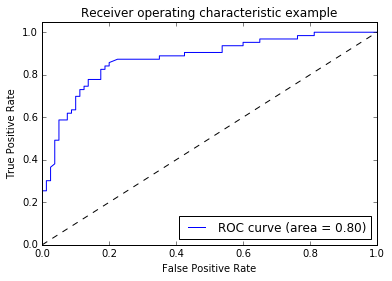

In [36]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
